![CC-BY-SA](https://mirrors.creativecommons.org/presskit/buttons/88x31/svg/by-sa.svg)


This notebook was created by [Bernardo Freitas Paulo da Costa](http://www.im.ufrj.br/bernardofpc),
and is licensed under Creative Commons BY-SA.

Antes de enviar este Teste, verifique que tudo está funcionando como esperado.
Por exemplo, **rode o código inteiro, do zero**.
Para isso, vá no menu, escolha _Kernel_, depois _Restart & Run All_.

Verifique, também, que você respondeu todas as questões:
* as questões de código têm `YOUR CODE HERE` (e você pode apagar o `raise NotImplemented` ao incluir sua resposta)
* as questões discursivas têm "YOUR ANSWER HERE".

---

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from numpy.linalg import norm # Vamos usar muito !

# Mínimos quadrados _vs_ Equações Normais

Vimos duas formas de resolver um problema de regressão:
- encontrando a solução de mínimos quadrados para $Xp = b$;
- resolvendo as equações normais $X^\top X p = X^\top b$.

Neste teste, veremos como isto pode gerar diferenças no cálculo de $p$.

# Questão 1: Comparando soluções

Sejam dados uma matriz $A$, $m \times n$, e um vetor $b$.

Escreva uma função que retorna as duas soluções do problema de regressão,
a primeira usando `np.linalg.solve` e a segunda, `np.linalg.lstsq`.

In [2]:
def duas_sols(A,b):
 
  x1 = np.linalg.solve(A.T@A, A.T@b)
  x2, *_ = np.linalg.lstsq(A, b, rcond=None)

  return (x1, x2)

In [3]:
A = np.array([[0,1],[1,1],[2,1],[2,2],[3,2],[4,4]])
b = [1,2,3,4,5,6]

x1, x2 = duas_sols(A,b)
assert np.allclose(x1,x2)

In [4]:
A = np.array([[0,1],[1,1],[2,1],[2,2],[3,2],[4,4]])
b = [0,1,0,1,0,1]

x1, x2 = duas_sols(A,b)
assert np.allclose(x1,x2)

In [5]:
A = np.array([[0,1],[1,1],[2,1],[2,2],[3,2],[4,4]])
b = [1,1,1,0,0,0]

x1, x2 = duas_sols(A,b)

assert norm(x1-x2) < 1e-14

Ao resolver um problema de regressão, a medida "oficial" é o **erro de regressão**.
Assim, poderia muito bem haver duas soluções $x_1$ e $x_2$, diferentes,
mas tais que $\|Ax_1 - b\|$ e $\|Ax_2 - b\|$ fossem iguais.

Complete a sua função para retornar, também, o erro da regressão, para cada uma das soluções.
Retorne duas tuplas, uma com as 2 soluções, a segunda com os 2 erros.

In [6]:
def duas_sols_erros(A,b):
  x1, x2 = duas_sols(A,b)
  err1, err2 = norm(A@x1-b), norm(A@x2-b)
  return (x1,x2), (err1,err2)

In [7]:
A = np.array([[0,1],[1,1],[2,1],[2,2],[3,2],[4,4]])
b = [6,5,4,3,2,1]

(x1, x2), (e1, e2) = duas_sols_erros(A,b)
assert np.allclose(x1,x2)
assert 7 < e1 < 8
assert 7 < e2 < 8

Calcule os erros de regressão para cada um dos casos anteriores,
e também a diferença entre eles.

In [8]:
A = np.array([[0,1],[1,1],[2,1],[2,2],[3,2],[4,4]])
B =[[1,2,3,4,5,6],[0,1,0,1,0,1],[1,1,1,0,0,0],[6,5,4,3,2,1]]

print('{:^4}{:>20}   {:>20}      {:>20}{:>40} '.format('caso', 'erro 1', 'erro 2', 'diferença erro', 'diferença soluções'))
for  i, b  in enumerate(B): 
  (x1, x2), (e1, e2) = duas_sols_erros(A,b)
  diff_sol = x1-x2
  print('{:^4}   {:>2,.20f}   {:>2,.20f}   {:>2,.20f}  [{:>2,.20f}   {:>2,.20f}] '.format(i, e1, e2, e1-e2, diff_sol[0], diff_sol[1]))



caso              erro 1                 erro 2            diferença erro                      diferença soluções 
 0     1.22739297150240611600   1.22739297150240611600   0.00000000000000000000  [-0.00000000000000244249   0.00000000000000305311] 
 1     1.04446593573418700096   1.04446593573418700096   0.00000000000000000000  [0.00000000000000094369   -0.00000000000000116573] 
 2     1.62768260092397909489   1.62768260092397887284   0.00000000000000022204  [-0.00000000000000058287   0.00000000000000066613] 
 3     7.63110517774235841415   7.63110517774235841415   0.00000000000000000000  [-0.00000000000000199840   0.00000000000000199840] 


O que você observa?

O único caso em que os erros apareceram diferentes de $0$, apresentou um valor próximo a $0$. De todo modo, é possivel perceber que as soluções $x_1$ e $x_2$ não precisam ser exatamente iguais para que a diferença entre os erros seja $0$, como pode ser observado acima, pois o erro de regressão é $\|Ax_1 - b\|$ e $\|Ax_2 - b\|$.

# Questão 2: Analisando muitos casos

Para entender o comportamento médio, vamos gerar vetores $b$ aleatórios.

Compare, com um histograma, os erros de regressão, para 1000 vetores $b$ aleatórios, e a matriz $A$ acima.

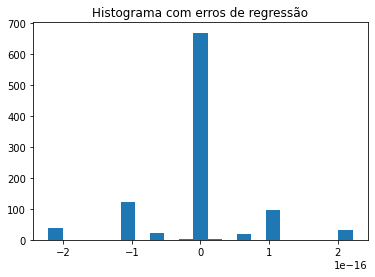

In [9]:
np.random.seed(1)
A = np.array([[0,1],[1,1],[2,1],[2,2],[3,2],[4,4]])
err = []
for i in range(0,1000):
  (x1, x2), (e1, e2) = duas_sols_erros(A,np.random.rand(6))
  err.append(e1-e2)
  
plt.hist(err, bins=21)
plt.title('Histograma com erros de regressão')
ax = plt.gca()

In [10]:
minx, maxx = ax.get_xlim()

assert -2e-15 < minx < maxx < 2e-15

Algum dos métodos dá consistentemente o menor erro?

Não. Os erros estão concentrados em $0$, o que significa que o erro de regressão em ambos os métodos foram iguais na maioria dos casos.


 Caso tivessemos tido uma concentração dos casos em valores negativos, significaria que o primeiro método `np.linalg.solve` teria valores de erro de regressão menores, e caso contrário, o método `np.linalg.lstsq`. Contudo, isso não ocorre, pois o histograma está quase simétrico, e apenas em poucos casos a mais apresenta uma diferença de erro negativo. 



Agora, vamos usar matrizes (bem) maiores.

Escolha uma matriz $A$, $30 \times 4$ com entradas uniformemente escolhidas em $[0,1]$,
e repita o que fizemos acima para 1000 valores aleatórios de $b$.

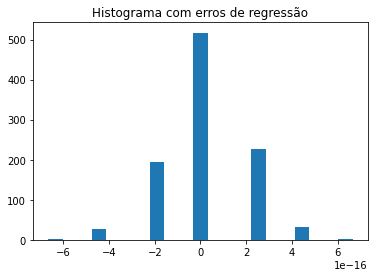

In [11]:
np.random.seed(2)
A = np.random.rand(30,4)

err = []
for i in range(0,1000):
  (x1, x2), (e1, e2) = duas_sols_erros(A,np.random.rand(30))
  err.append(e1-e2)
  
plt.hist(err, bins=21)
plt.title('Histograma com erros de regressão')

ax = plt.gca()

In [12]:
minx, maxx = ax.get_xlim()

assert -4e-15 < minx < maxx < 4e-15

O comportamento dos erros mudou?

Um pouco. O que aconteceu ao aumentarmos as dimensões da matriz, é que a diferença dos valores assumidos de erros de regressão entre os métodos aumentaram em alguns casos. 

Utilizando uma matriz menor, menos de $100$ casos apresentavam diferença entre os erros de regressão com módulo $ |2\cdot 10^{-16}| $. Com uma matriz maior, mais casos estão concentrados nessa faixa, por volta de $200$ para diferenças negativas e um pouco mais que $200$ para diferenças positivas. Contudo, agora a diferença entre os erros também podem assumir em alguns (poucos) casos valores de erro de regressao com módulo  $ |4\cdot 10^{-16}| $ ou até mesmo  $ |6\cdot 10^{-16}| $.

De todo modo, os erros de regressão estão iguais em ambos os métodos na maioria dos casos, por mais que a quantidade de casos iguais a $0$ no histograma tenha diminuido e algumas diferenças maiores aparecido. No geral, o comportamento continua simétrico, embora o segundo método tenha apresentado um erro menor em poucos casos a mais. 

E agora, faça para matrizes $300 \times 10$.

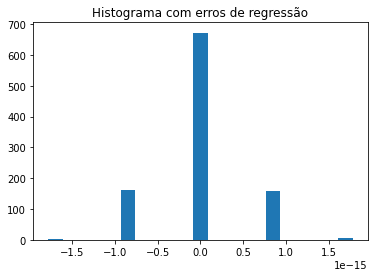

In [13]:
np.random.seed(1)
A = np.random.rand(300,10)

err = []
for i in range(0,1000):
  (x1, x2), (e1, e2) = duas_sols_erros(A,np.random.rand(300))
  err.append(e1-e2)

plt.hist(err, bins=21)
plt.title('Histograma com erros de regressão')

ax = plt.gca()

In [14]:
minx, maxx = ax.get_xlim()

assert -10e-15 < minx < maxx < 10e-15

Esse gráfico confirma a tendência quando a matriz fica maior?

Sim, embora as soluções dos diferentes métodos apresentem uma diferença entre os erros de regressão igual a $0$ na maioria dos casos, a tendência é que alguns casos apresentem uma diferença de erro de regressão ainda maior com o aumento da matriz, podendo atigir diferenças entre os erros maiores em módulo que $ |1.5\cdot 10^{-15}| $.

O comportamento continua simétrico, o que indica que nenhum método apresentou valores de erro de regreção siginificativamente menores que outro no geral. 

# Questão 3: Matrizes de Hilbert

A matriz de Hilbert é uma matriz famosa, cujas entradas $H_{i,j}$ são $\frac{1}{i+j-1}$.

Por exemplo, a matriz $3\times 2$ é
$$\begin{bmatrix}
  1 & 1/2 \\
1/2 & 1/3 \\
1/3 & 1/4
\end{bmatrix}$$

Escreva a função `hilb(n,m)` que retorna a matriz de Hilbert $n \times m$:

In [15]:
def hilb(n,m):
  A= []
  for i in range(1,n+1):
    v=[]
    for j in range(1, m+1):
      v.append(1/(i+j-1))
    A.append(v)
  return np.array(A)

In [16]:
assert np.all(hilb(3,2) == [[1, 1/2], [1/2, 1/3], [1/3, 1/4]])

In [17]:
H = hilb(40,20)
assert H.shape == (40,20)

In [18]:
H = hilb(30,4)
assert H[10,3] == 1/(10+3+1)

Explique porque o teste acima é feito com $\frac{1}{10+3+1}$ em vez de $\frac{1}{10+3-1}$.

Porque no desenvolvimento da matriz de Hilbert, as entradas assumem valores de acordo com a sua posição e começamos a contagem dos indices para linhas e colunas a partir de $1$ no cálculo do valor que a entrada $H_{i,j}$ deve assumir. Esse valor corresponde a $\frac{1}{i+j-1}$. Contudo ao acessar matrizes e vetores devemos considerar que o primeiro elemento tem indice $0$. Ou seja, ao acessar a entrada $H[10,3]$, de acordo com o desenvolvimento criado, estaremos acessando o valor de $\frac{1}{(10+1) +(3 +1)-1} = \frac{1}{11+4-1} =  \frac{1}{10 +3 +1} $.

Portando, o calculo é feito dessa maneira, para deslocar os indices em $1$ posição, já que com indices comecando em $0$, esse cálculo daria uma indeterminação, pois possui divisão por $0$. Enquanto isso, a construção da matriz de Hilbert partindo de entradas $H_{i,j}$ e indices $i, j \geq 0$ devem atender aos valores de $\frac{1}{i+j+1}$.

# Questão 4: Regressão com a matriz de Hilbert

Considere a matriz de Hilbert $30 \times 4$, e calcule a regressão para um vetor $b$ aleatório.
Calcule
- a diferença entre as soluções; e
- a diferença entre os erros de regressão.

In [19]:
np.random.seed(1)
H = hilb(30,4)
(x1, x2), (e1, e2) = duas_sols_erros(H,np.random.rand(30))

dx = (x2-x1)
de = (e1-e2)

print('\n Diferença soluções:\n', dx)
print('\n Diferença erros de regressão:\n', de)



 Diferença soluções:
 [-4.13999146e-09  3.60041099e-08 -7.30622105e-08  4.19204298e-08]

 Diferença erros de regressão:
 -3.552713678800501e-15


Calcule, também, o erro relativo entre as soluções, de duas formas:
- coordenada a coordenada, $\frac{|x1_i - x2_i|}{|x1_i| + |x2_i|}$,
- global, $\frac{||x1 - x2||}{||x1|| + ||x2||}$.

(Obs: como não há um método que seja "a priori" mais exato do que o outro, normalizamos pela soma dos valores absolutos)

In [20]:
#Erro relativo coordenada a coordenada

err_coord = [(abs(x1i - x2i)/(abs(x1i) + abs(x2i))) for (x1i,x2i) in zip(x1,x2)]
err_glob = (norm(x1 - x2)/(norm(x1) + norm(x2)))

print('\n Erro relativo entre as soluções coordenada a coordenada:\n', err_coord)
print('\n Erro relativo entre as soluções global:\n', err_glob)


 Erro relativo entre as soluções coordenada a coordenada:
 [4.074817806471006e-11, 3.640636485696154e-11, 3.363047564429874e-11, 3.1554959888932234e-11]

 Erro relativo entre as soluções global:
 3.354447851272506e-11


Agora, aumente para $300 \times 10$, e calcule
- a diferença entre as soluções,
- os erros relativos entre as soluções,
- a diferença entre os erros de regressão.

In [21]:
np.random.seed(1)
H = hilb(300,10)
(x1, x2), (e1, e2) = duas_sols_erros(H,np.random.rand(300))

dx = (x1-x2)
de = (e1-e2)
err_coord = [(abs(x1i - x2i)/(abs(x1i) + abs(x2i))) for (x1i,x2i) in zip(x1,x2)]
err_glob = (norm(x1 - x2)/(norm(x1) + norm(x2)))

print('\n Diferença soluções:\n', dx)
print('\n Erro relativo entre as soluções coordenada a coordenada:\n', err_coord)
print('\n Erro relativo entre as soluções global:\n', err_glob)
print('\n Diferença erros de regressao:\n', de)


 Diferença soluções:
 [ 2.12270175e+05 -9.99345434e+06  1.23842187e+08 -6.81866098e+08
  2.01163979e+09 -3.43074297e+09  3.42693418e+09 -1.91052203e+09
  5.07273481e+08 -3.67770286e+07]

 Erro relativo entre as soluções coordenada a coordenada:
 [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.9442343126360888, 0.48891962252276305, 0.23714203143325427, 0.07758068289887565]

 Erro relativo entre as soluções global:
 0.765925859147997

 Diferença erros de regressao:
 7.875755493316929


O que aconteceu?

Ao utilizar uma matriz de Hilbert maior em um segundo momento, é possivel notar uma diferença significativa entre as soluções dos dois métodos utilizados. Considerando o cálculo para matriz $H_{300,10}$, temos que o número de coeficientes para ajuste também aumentou(coordenadas das soluções), com isso, as primeiras coordenadas apresentaram uma difereça com ordem maior entre as soluções ao comparar com a diferença entre as soluções na matriz $H_{30,4}$ . 

Além disso, um erro relativo entre as soluções coordenada a coordenada igual a $1$, representa um erro muito grande, pois o erro relativo é a razão entre o erro absoluto entre as soluções e a soma dos valores absolutos das soluções. Como no resultado o erro relativo é igual ou próximo a $1$ em algumas coordenadas, isso repressenta que esses erros estão na ordem da soma das soluções. Porém, o que seria desejavel é que o erro relativo coordenada a coordenada apresente um valor baixo, indicando que as soluções de ambos os métodos são parecidas, contudo isso não ocorre nesse caso. Podemos observar também que o erro relativo global é alto, mesmo que não seja igual a $1$. 

Em relação aos erros de regressão, é possivel observar que tem um aumento significativo na diferença entre os métodos quando comparamos a matriz $H_{300,10}$ com $H_{30,4}$. Além disso, em ambos os casos, a diferença entre os erros de regressão apresentaram valores posivitos, o que representa que o método `np.linalg.solve` apresentou erro maior que o método `np.linalg.lstsq`, além de soluções com erros de regressão muito distintos para os métodos.  

Abaixo, são feitos os cálculos de erros e diferenças de soluções para a matriz $H_{300,4}$.  Ao aumentar somente o número de linhas e manter o número de colunas em $4$, os resultados foram bem melhores em comparação a utilização dos métodos com $10$ colunas, apresentando erros relativos muito inferiores, e portanto, soluções mais parecidas entre os métodos. 

É possivel perceber, portanto, que aumentar o número de colunas para matriz de Hilbert trouxe resultados muito piores, tendo em vista que o número de coordenadas solução (coeficientes calculados pelos métodos) aumenta e resulta em soluções com diferenças muito grandes ao comparar os métodos `np.linalg.solve` com `np.linalg.lstsq`.

In [22]:
np.random.seed(1)
H = hilb(300,4)
(x1, x2), (e1, e2) = duas_sols_erros(H,np.random.rand(300))

dx = (x1-x2)
de = (e1-e2)
err_coord = [(abs(x1i - x2i)/(abs(x1i) + abs(x2i))) for (x1i,x2i) in zip(x1,x2)]
err_glob = (norm(x1 - x2)/(norm(x1) + norm(x2)))

print('\n Diferença soluções:\n', dx)
print('\n Erro relativo entre as soluções coordenada a coordenada:\n', err_coord)
print('\n Erro relativo entre as soluções global:\n', err_glob)
print('\n Diferença erros de regressao:\n', de)



 Diferença soluções:
 [-3.67133737e-08  3.08810058e-07 -6.10047664e-07  3.42215117e-07]

 Erro relativo entre as soluções coordenada a coordenada:
 [1.3222680343509172e-10, 1.1737900961442015e-10, 1.0779548675547919e-10, 1.007320059579301e-10]

 Erro relativo entre as soluções global:
 1.0764757925875527e-10

 Diferença erros de regressao:
 0.0


# Questão 5: Outro sistema

Agora, considere a matriz com entradas inteiras em sequência:
$$ A = \begin{bmatrix}
1 & 2 & 3 \\
4 & 5 & 6 \\
7 & 8 & 9 \\
10 & 11 & 12 \\
13 & 14 & 15 \\
16 & 17 & 18
\end{bmatrix} $$

Resolva o problema de regressão para o vetor $b = (1,1,1,1,1,1)$, pelos dois métodos, e calcule os erros.

In [23]:
# VAI DAR ERRO POIS MATRIZ A^T.A SINGULAR!

A = np.arange(1,19).reshape((6, 3))
b = np.ones(6)


(x1, x2), (e1, e2) = duas_sols_erros(A,np.random.rand(6))

LinAlgError: ignored

O que aconteceu?

Nessa matriz escolhida $A$, temos que o determinante da matriz $A^T \cdot A $ é zero, caracterizando-a como uma matriz singular. Portanto, mesmo que a matriz $A^T \cdot A $ seja quadrada, se ela é singular, ou seja, se não é inversível, então não existe solução para o sistema linear utilizando a função `np.linalg.solve`. A seguir o cálculo do determinante da matriz quadrada $A^T \cdot A$:

In [24]:
det_A = np.linalg.det(A.T @ A)
print(det_A)

0.0
